In [22]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [23]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [24]:
df = pd.read_csv("../Python/Output/Lib_Linear_16.txt", sep='\t')
df.head()

,SinSource,NoiseType,Noise,Signal,Order,Freq,Test,Uncertainty Mean,Uncertainty Deviation,Uncertainty Minimum,...,2991.0,2992.0,2993.0,2994.0,2995.0,2996.0,2997.0,2998.0,2999.0,3000.0
0,LibSin,Gaussian,0,Linear,16,0,Forward,1.273298e-09,1.871188e-09,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,LibSin,Gaussian,0,Linear,16,0,Reverse,4.776992e-12,1.790320e-12,2.499982e-12,...,0.000028,0.000083,0.000073,0.000055,0.000083,0.000046,0.000083,0.000064,0.000073,0.000009
2,LibSin,Gaussian,0,Linear,16,0,Roundtrip,9.935659e-12,1.228345e-12,8.607469e-12,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [25]:
sHisto = [str(i/1) for i in range(-3000, 3001, 1)]
df[sHisto].head()

,-3000.0,-2999.0,-2998.0,-2997.0,-2996.0,-2995.0,-2994.0,-2993.0,-2992.0,-2991.0,...,2991.0,2992.0,2993.0,2994.0,2995.0,2996.0,2997.0,2998.0,2999.0,3000.0
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.000018,0.000009,0.000009,0.000037,0.000018,0.000018,0.000018,0.0,0.000018,...,0.000028,0.000083,0.000073,0.000055,0.000083,0.000046,0.000083,0.000064,0.000073,0.000009
2,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [26]:
def PlotHistogram( order, noise, sinSource, signal, freq=0, ylim=[] ):
    signalName = 'Sin/Cos' if signal=='Aggr' else signal if signal=='Linear' else f'{signal} freq={freq}'
    df['legend'] = df['Test'] + " " + df['NoiseType']

    dfHisto = df[(df['Order']==order) & (df['Noise']==noise) & (df['SinSource']==sinSource) & (df['Signal']==signal) & (df['Freq']==freq)]\
                .set_index('legend')
    ax = dfHisto[sHisto].T.plot(style=['m-', 'g-', 'b-', 'mx', 'gx', 'bx'],
                           title=f'{signalName} order={order} noise={noise} using {sinSource}')
    ax.set_xlabel('Normalized Error')
    ax.set_ylabel('Normalized Histogram Count')
    if ylim:
        ax.set_ylim(ylim)

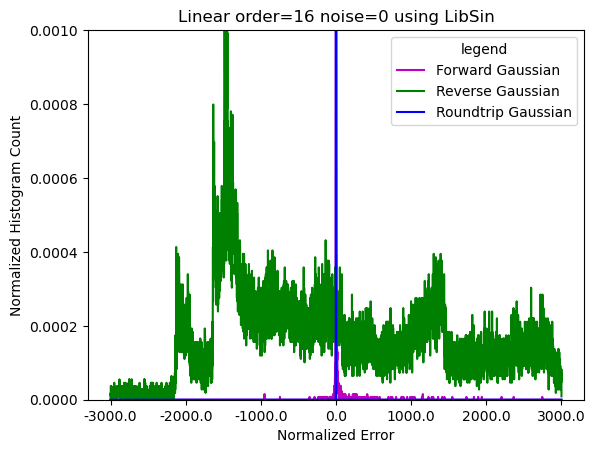

In [27]:
PlotHistogram(16, 0, 'LibSin', 'Linear', ylim=[0, 0.001])